In [118]:
import os
import pandas as pd

# Path to the folder containing the CSV files
folder_path = './data/santiago_total/'

# Initialize an empty list to store the individual DataFrames
dfs = []

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, axis=0)

# Path to save the combined DataFrame as CSV
output_path = './data/santiago_total/combined.csv'

combined_df.drop_duplicates(inplace=True)

# Save the combined DataFrame as a CSV file
combined_df.to_csv(output_path, index=False)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
parameters = {'axes.labelsize': 16,
                'axes.titlesize': 25,
                "xtick.labelsize": 12,
                "ytick.labelsize": 12}

plt.rcParams.update(parameters)

sns.set_style("darkgrid")

0       580.000
1       450.000
2       522.000
3       548.000
4       450.000
         ...   
5365    250.000
5366    295.000
5367    250.000
5368    300.000
5369    300.000
Name: precio, Length: 5370, dtype: object
5370
5177


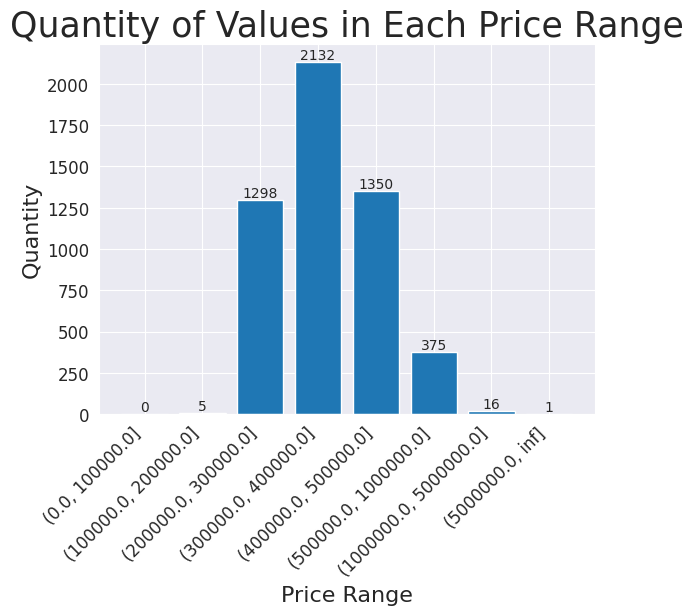

Median: 360000.0
Standard Deviation: 139175.20857032744
Mean: 382220.00487541046


In [2]:
# Specify the file path or URL of the CSV file
file_path = './data/santiago_total/combined.csv'

# Read the CSV file into a DataFrame
combined_df = pd.read_csv(file_path)

# Data
# Remove thousands separators
combined_df['precio'] = combined_df['precio'].apply(lambda x: x + '00' if x.endswith('.0') else x)

print(combined_df['precio'])
combined_df['precio'] = combined_df['precio'].replace('\.', '', regex=True)

print(len(combined_df['precio']))

combined_df['precio'] = pd.to_numeric(combined_df['precio'])

multiplier = 35991.13

combined_df.loc[combined_df['precio'] < 150000, 'precio'] *= multiplier

threshold = 5500000

#prices = [x for x in prices if x <= threshold]
combined_df = combined_df[combined_df['precio'] <= threshold]

print(len(combined_df))
#print(len(prices))
#print(min(prices))
#print(max(prices))
# Define the price ranges
price_ranges = [0, 100000, 200000,300000,400000, 500000, 1000000, 5000000, float('inf')]

# Assuming your DataFrame is called 'df' and the column with prices is called 'prices'
combined_df['precio_range'] = pd.cut(combined_df['precio'], bins=price_ranges)

price_counts = combined_df['precio_range'] .value_counts().sort_index()

# Plot the bar chart
plt.bar(price_counts.index.astype(str), price_counts.values)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Quantity')
plt.title('Quantity of Values in Each Price Range')

# Rotate and align the x-labels vertically
plt.xticks(rotation=45, ha='right')
# Add the exact values on top of each bar
for i, v in enumerate(price_counts.values):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')

# Display the plot
plt.show()


# Calculate the median
median_value = combined_df['precio'].median()

# Calculate the standard deviation
std_value = combined_df['precio'].std()

# Calculate the mean
mean_value = combined_df['precio'].mean()

print("Median:", median_value)
print("Standard Deviation:", std_value)
print("Mean:", mean_value)



0       580.000
1       450.000
2       522.000
3       548.000
4       450.000
         ...   
5365    250.000
5366    295.000
5367    250.000
5368    300.000
5369    300.000
Name: precio, Length: 5370, dtype: object
5370
5177
150000.0
5398669.5


/tmp/ipykernel_220970/14169823.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['precio'][combined_df['precio'] < 150000] *= multiplier


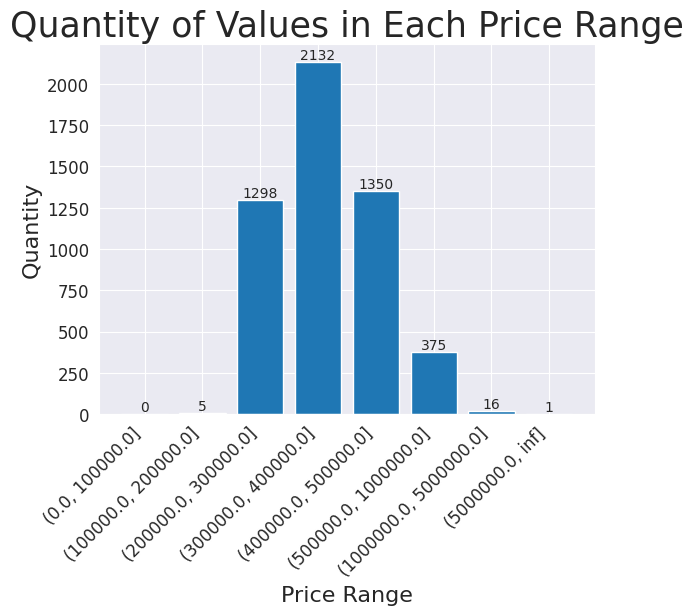

Median: 360000.0
Standard Deviation: 139175.20857032744
Mean: 382220.00487541046


In [10]:
# Specify the file path or URL of the CSV file
file_path = './data/santiago_total/combined.csv'

# Read the CSV file into a DataFrame
combined_df = pd.read_csv(file_path)

# Data
# Remove thousands separators
combined_df['precio'] = combined_df['precio'].apply(lambda x: x + '00' if x.endswith('.0') else x)

print(combined_df['precio'])
combined_df['precio'] = combined_df['precio'].replace('\.', '', regex=True)

print(len(combined_df['precio']))

combined_df['precio'] = pd.to_numeric(combined_df['precio'])

multiplier = 35991.13

combined_df['precio'][combined_df['precio'] < 150000] *= multiplier

threshold = 5500000

#combined_df['precio'] = [x for x in prices if x <= threshold]

combined_df = combined_df[combined_df['precio'] < threshold]

print(len(combined_df['precio']))
print(min(combined_df['precio']))
print(max(combined_df['precio']))
# Define the price ranges
price_ranges = [0, 100000, 200000,300000,400000, 500000, 1000000, 5000000, float('inf')]

# Assuming your DataFrame is called 'df' and the column with prices is called 'prices'
combined_df['precio_ranges'] = pd.cut(combined_df['precio'] , bins=price_ranges)

price_counts = combined_df['precio_ranges'].value_counts().sort_index()

# Plot the bar chart
plt.bar(price_counts.index.astype(str), price_counts.values)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Quantity')
plt.title('Quantity of Values in Each Price Range')

# Rotate and align the x-labels vertically
plt.xticks(rotation=45, ha='right')
# Add the exact values on top of each bar
for i, v in enumerate(price_counts.values):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')

# Display the plot
plt.show()

# Calculate the median
median_value = combined_df['precio'].median()

# Calculate the standard deviation
std_value = combined_df['precio'].std()

# Calculate the mean
mean_value = combined_df['precio'].mean()

print("Median:", median_value)
print("Standard Deviation:", std_value)
print("Mean:", mean_value)

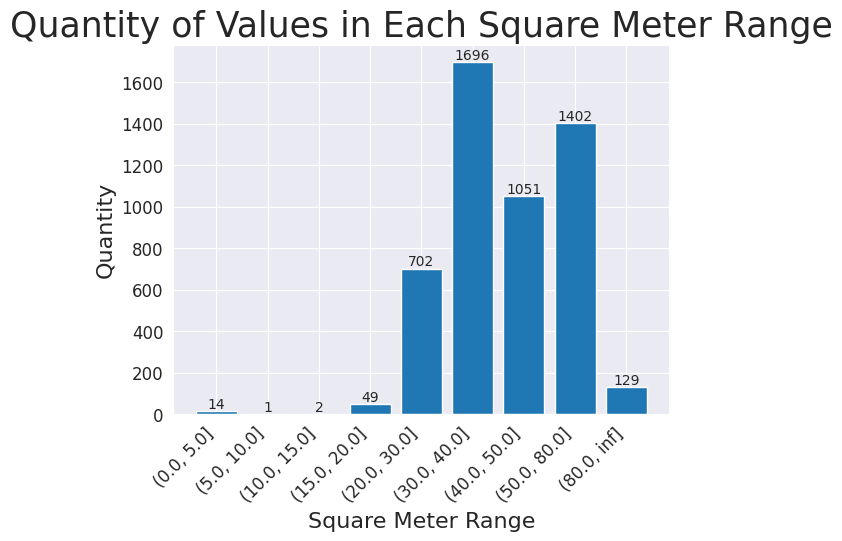

Median: 41.0
Standard Deviation: 127.51514399120518
Mean: 49.54653190646056
1.0
5523.0


In [3]:
combined_df['num_caracteristicas'] = pd.to_numeric(combined_df['num_caracteristicas'])
combined_df = combined_df[combined_df['num_caracteristicas'] != 0]
# Check if 'metros_cuadrados' column contains 'm² totales'
condition = combined_df['caracteristicas'].str.contains('m² totales')

# Filter 'df' based on the condition
combined_df = combined_df[condition]

combined_df['metros_cuadrados'] = combined_df['caracteristicas'].str.split(' m² totales').str[0]

# Convert 'metros_cuadrados' to numeric, setting invalid values to NaN
combined_df['metros_cuadrados'] = pd.to_numeric(combined_df['metros_cuadrados'], errors='coerce')

# Drop rows where 'metros_cuadrados' is NaN after conversion
combined_df.dropna(subset=['metros_cuadrados'], inplace=True)
# Define the price ranges
metros_cuadrados_ranges = [0, 5,10,15,20,30,40,50,80, float('inf')]

# Assuming your DataFrame is called 'df' and the column with prices is called 'prices'
combined_df['metros_cuadrados_ranges']= pd.cut(combined_df['metros_cuadrados'] , bins=metros_cuadrados_ranges)

metros_cuadrados_counts = combined_df['metros_cuadrados_ranges'].value_counts().sort_index()

# Plot the bar chart
plt.bar(metros_cuadrados_counts.index.astype(str), metros_cuadrados_counts.values)

# Add labels and title
plt.xlabel('Square Meter Range')
plt.ylabel('Quantity')
plt.title('Quantity of Values in Each Square Meter Range')

# Rotate and align the x-labels vertically
plt.xticks(rotation=45, ha='right')
# Add the exact values on top of each bar
for i, v in enumerate(metros_cuadrados_counts.values):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')

# Display the plot
plt.show()

# Calculate the median
median_value = combined_df['metros_cuadrados'].median()

# Calculate the standard deviation
std_value = combined_df['metros_cuadrados'].std()

# Calculate the mean
mean_value = combined_df['metros_cuadrados'].mean()

print("Median:", median_value)
print("Standard Deviation:", std_value)
print("Mean:", mean_value)

print(min(combined_df['metros_cuadrados']))
print(max(combined_df['metros_cuadrados']))

In [ ]:
combined_df['num_caracteristicas'] = pd.to_numeric(combined_df['num_caracteristicas'])
combined_df = combined_df[combined_df['num_caracteristicas'] != 0]
# Check if 'metros_cuadrados' column contains 'm² totales'
condition = combined_df['caracteristicas'].str.contains('m² totales')

# Filter 'df' based on the condition
combined_df = combined_df[condition]

combined_df['metros_cuadrados'] = combined_df['caracteristicas'].str.split(' m² totales').str[0]

# Convert 'metros_cuadrados' to numeric, setting invalid values to NaN
combined_df['metros_cuadrados'] = pd.to_numeric(combined_df['metros_cuadrados'], errors='coerce')

# Drop rows where 'metros_cuadrados' is NaN after conversion
combined_df.dropna(subset=['metros_cuadrados'], inplace=True)
# Define the price ranges
metros_cuadrados_ranges = [0, 5,10,15,20,30,40,50,80, float('inf')]

# Assuming your DataFrame is called 'df' and the column with prices is called 'prices'
combined_df['metros_cuadrados_ranges']= pd.cut(combined_df['metros_cuadrados'] , bins=metros_cuadrados_ranges)

metros_cuadrados_counts = combined_df['metros_cuadrados_ranges'].value_counts().sort_index()

# Plot the bar chart
plt.bar(metros_cuadrados_counts.index.astype(str), metros_cuadrados_counts.values)

# Add labels and title
plt.xlabel('Square Meter Range')
plt.ylabel('Quantity')
plt.title('Quantity of Values in Each Square Meter Range')

# Rotate and align the x-labels vertically
plt.xticks(rotation=45, ha='right')
# Add the exact values on top of each bar
for i, v in enumerate(metros_cuadrados_counts.values):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')

# Display the plot
plt.show()

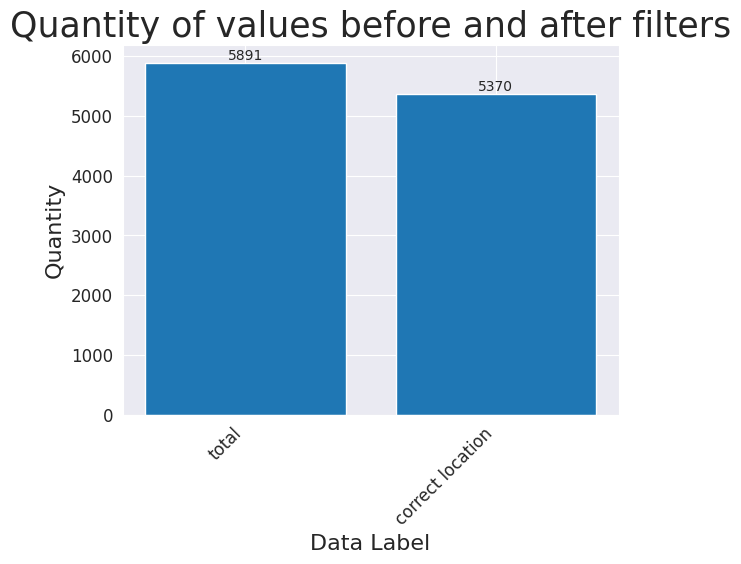

In [128]:
# Plot the bar chart
plt.bar(['total','correct location'], [5891, 5370])

# Add labels and title
plt.xlabel('Data Label')
plt.ylabel('Quantity')
plt.title('Quantity of values before and after filters')

# Rotate and align the x-labels vertically
plt.xticks(rotation=45, ha='right')
# Add the exact values on top of each bar
for i, v in enumerate([5891, 5370]):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')

# Display the plot
plt.show()